In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [2]:

math.sqrt(452)

21.2602916254693

In [3]:
math.sqrt(((23-12)*(23-12))+((34-12)*(34-12)))

24.596747752497688

In [4]:
math.sqrt(((7-12)*(7-12))+((50-12)*(50-12)))

38.3275357934736

In [5]:
a = np.array([[12,31,17,19,13],[23,31,15,27,11],[45,31,25,45,27]])

In [6]:
a[0].mean()

18.4

In [7]:
a[1].mean()

21.4

In [8]:
a[2].mean()

34.6

In [9]:
import math

In [10]:
math.sqrt(25)

5.0

## Python implementation of k means clustering

In [11]:
df_online = pd.read_csv('Online_Retail.csv',encoding='utf-8')
df_online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [12]:
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
df_online.shape

(541909, 8)

#### Missing values

In [14]:
(df_online.isnull().sum()/len(df_online))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [15]:
df_online = df_online.dropna()
df_online.shape

(406829, 8)

In [16]:
(df_online.isnull().sum()/len(df_online))*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

### Prepare data for modelling
- R - Recency - no of days since last purchase
- F - Frequency - no of transactions
- M - Monetary - Amount of transation

In [17]:
df_online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [19]:
df_online['Amount']=df_online.Quantity * df_online.UnitPrice

In [21]:
df_online.head() # added Amoint for Monetary

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [22]:
# monitory

df_online.groupby('CustomerID')['Amount'].sum()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [53]:
df_cust_amount = pd.DataFrame(df_online.groupby('CustomerID')['Amount'].sum())
df_cust_amount = df_cust_amount.reset_index()
df_cust_amount

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [54]:
df_cust_frequency = pd.DataFrame(df_online.groupby('CustomerID')['InvoiceNo'].count())
df_cust_frequency = df_cust_frequency.reset_index()
df_cust_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [56]:
df_grouped = pd.merge(df_cust_amount,df_cust_frequency,on='CustomerID',how='inner')

In [57]:
df_grouped

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [58]:
df_online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [64]:
df_online.InvoiceDate = pd.to_datetime(df_online.InvoiceDate,format='%d-%m-%Y %H:%M')

In [66]:
max_date =  max(df_online.InvoiceDate)

In [67]:
df_online['Diff_date'] = max_date -df_online.InvoiceDate
df_online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [68]:
# recency

df_cust_last_purchase = pd.DataFrame(df_online.groupby('CustomerID')['Diff_date'].min())
df_cust_last_purchase = df_cust_last_purchase.reset_index()
df_cust_last_purchase

,CustomerID,Diff_date
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [69]:
df_grouped = pd.merge(df_grouped,df_cust_last_purchase,on='CustomerID',how='inner')
df_grouped.head()

,CustomerID,Amount,InvoiceNo,Diff_date
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [74]:
df_grouped.Diff_date = df_grouped.Diff_date.dt.days

In [75]:
df_grouped.head()

,CustomerID,Amount,InvoiceNo,Diff_date
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### outliers

[]

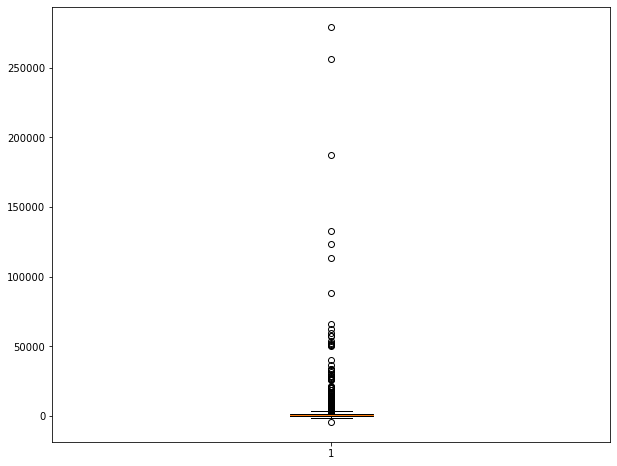

In [88]:
plt.figure(figsize=(10,8))
plt.boxplot(df_grouped.Amount)
plt.plot()

### Check outlier from point of view of 
- Statstical outlier
- Domain outlier - consult domain expert

[]

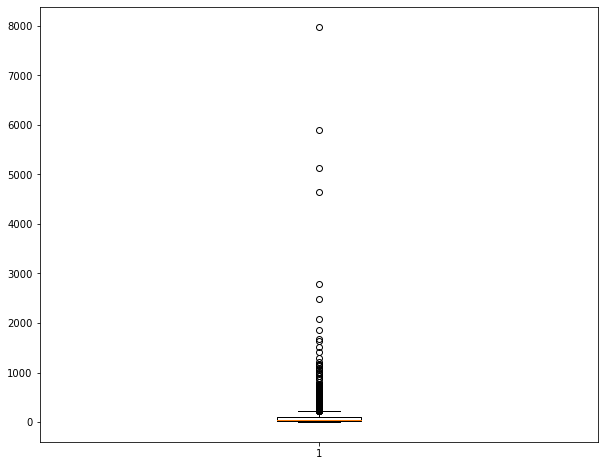

In [86]:
plt.figure(figsize=(10,8))
plt.boxplot(df_grouped.InvoiceNo)
plt.plot()

[]

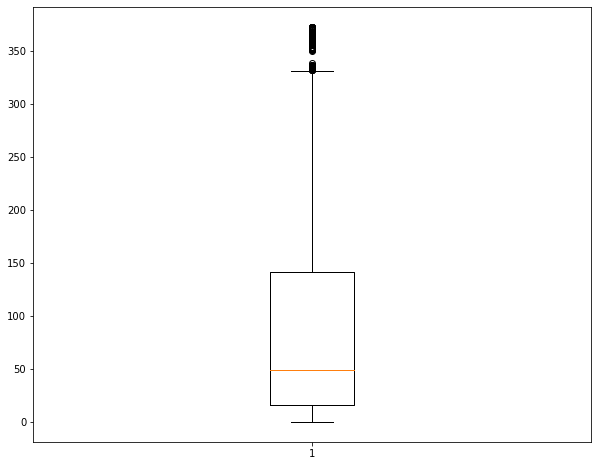

In [84]:
plt.figure(figsize=(10,8))
plt.boxplot(df_grouped.Diff_date)
plt.plot()

In [89]:
df_grouped.columns

Index(['CustomerID', 'Amount', 'InvoiceNo', 'Diff_date'], dtype='object')

In [91]:
df_grouped.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']

In [92]:
df_grouped.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### Rescaling 
1. Standerdisation
2. Normalization

In [99]:
df_rescale = df_grouped[['Amount', 'Frequency', 'Recency']]
df_rescale.head()

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [100]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [103]:
df_rescale_scale = scaler.fit_transform(df_rescale)
df_rescale_scale.shape

(4372, 3)

In [105]:
df_rescale_scale # this is min max scaler - mean is 1 standard div is 0

array([[-0.23100099, -0.3917197 ,  2.32202285],
       [ 0.29343167,  0.38265697, -0.89373323],
       [-0.01231622, -0.26695902, -0.1691956 ],
       ...,
       [-0.20951263, -0.34439668, -0.83418219],
       [ 0.02390005,  2.85205812, -0.87388289],
       [-0.00744423, -0.0991774 , -0.48680114]])

In [111]:
df_rescaled = pd.DataFrame(df_rescale_scale)
df_rescaled.columns = ['Amount', 'Frequency', 'Recency']
df_rescaled.head()

,Amount,Frequency,Recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


In [126]:
from sklearn.cluster import KMeans

In [127]:
kmeans =  KMeans(n_clusters=4,max_iter=50)
kmeans.fit(df_rescaled)

KMeans(max_iter=50, n_clusters=4)

In [128]:
kmeans.inertia_

4013.8552489160033

#### Finding optimal range of clusters

In [129]:
help(kmeans)

Help on KMeans in module sklearn.cluster._kmeans object:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for

In [135]:
km =  KMeans(n_clusters=1,max_iter=50)
km.fit(df_rescaled)
km.inertia_

13115.999999999978

In [139]:
## get inertia_

ssd = [] # sum of squared distances

for n_clusters in range(2,8):
    print(n_clusters)
    km =  KMeans(n_clusters=n_clusters,max_iter=50)
    km.fit(df_rescaled)
    ssd.append(km.inertia_)
ssd    

2
3
4
5
6
7


[8988.644490981602,
 5408.404670803712,
 4014.023255687515,
 2938.1243254532797,
 2323.1754741819123,
 1861.9944359821097]

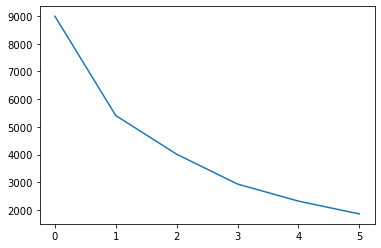

In [144]:
plt.plot(ssd)
plt.xticks(x, labels=, rotation ='vertical')

### Silhoutte score
- Silhoutte score =  (p-q)/max(p,q)
- p is the mean distance to the points in nearest cluster that the data point is NOT a part of
- q = intra cluster diatance to all the points in its own cluster

Get max between -1 and 1
- Score near to 1 means data is very similar to other data points in the cluster
- score closure to -1 means data is not similar to other data points in the cluster

In [145]:
from sklearn.metrics import silhouette_score

In [147]:
## get inertia_

ss = [] # sum of squared distances

for n_clusters in range(2,8):
    km =  KMeans(n_clusters=n_clusters,max_iter=50)
    km.fit(df_rescaled)
    s = silhouette_score(df_rescaled,km.labels_)
    print(n_clusters, s)
ss   

2 0.9344641162235822
3 0.6003883114752382
4 0.5974616027126741
5 0.6160117259955692
6 0.5921489832757454
7 0.5237772274142556


[]

### Heirarchial clustering

In [148]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree